In [1]:
from jupyterthemes import jtplot

jtplot.style(theme='onedork')
jtplot.style(context='notebook', fscale=1.4, spines=False, gridlines='--')
jtplot.style(ticks=True, grid=False, figsize=(5, 4.5))

import math
import matplotlib.pyplot as plt
import numpy as np
import cmath
import numpy.polynomial.polynomial as poly
from matplotlib.colors import hsv_to_rgb


In [2]:
def newton_set(f, df, roots, width, height, cx, cy, mnx, mxx, mny, mxy, niter, zoom):
    pixels = np.arange(width*height*3, dtype=np.float32).reshape(height, width, 3)

    h = 1e-7
    eps = 1e-3

    multcol = 5
    
    for y in range(height):
        zy = cy + map(y, 0, height, mny*zoom, mxy*zoom)
        
        for x in range(width):            
            zx = cy + map(x, 0, width, mnx*zoom, mxx*zoom)
            z = complex(zx, zy)
            count = 0
            
            for i in range(niter):                           
                dz = df(z)
                if dz == 0:
                    break
        
                znext = z - (f(z) / dz) # Newton iteration
                
                pixels[height-y-1,x] = (0, 0, 0)
                
                if abs(znext - z) < eps: # stop when close enough to any root
                    break
                
                z = znext
                count += 1
                
            for j, root in enumerate(roots):
                    cMap = map(count, 0, 20, 1, 0.5)
                    
                    if abs(z - root) < eps:
                        pixels[height-y-1,x] = hsv_to_rgb((
                            map(j, 0, len(roots), 0, 1) * cMap, 
                            map(j, 0, len(roots), 0, 1) * cMap,
                            1 * cMap
                        ))
                    
    return pixels

def ds(f, df, roots, name,
       width = 500, height = 500,
       cx = 0, cy = 0, mnx = -2.5, 
       mxx = 2.5, mny = -2.5, mxy = 2.5, 
       niter = 250, zoom = 1):
    
    print("Z region from (",
          cx + map(0, 0, width, mnx*zoom, mxx*zoom),
          ",",
          cy + map(0, 0, height, mny*zoom, mxy*zoom) ,
          ") to (",
          cx + map(width, 0, width, mnx*zoom, mxx*zoom),
          ",",
          cy + map(height, 0, height, mny*zoom, mxy*zoom),
          ")"
         )
    
    pimg = newton_set(f, df, roots, width, height, cx, cy, mnx, mxx, mny, mxy, niter, zoom)
    
    plt.title('Newton Fractal ' + name)
    
    plt.xlabel("real"
               + "("
               + str(cx + map(0, 0, width, mnx*zoom, mxx*zoom))
               + ","
               + str(cx + map(width, 0, width, mnx*zoom, mxx*zoom))
               + ")"
              )
    
    plt.ylabel("imaginary"
               + "("
               + str(cy + map(0, 0, height, mny*zoom, mxy*zoom))
               + ","
               + str(cy + map(height, 0, height, mny*zoom, mxy*zoom)) 
               + ")")
    
    plt.imshow(pimg)
    plt.show()

def map(value, istart, istop, ostart, ostop):
    return ostart + (ostop - ostart) * ((value - istart) / (istop - istart))

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


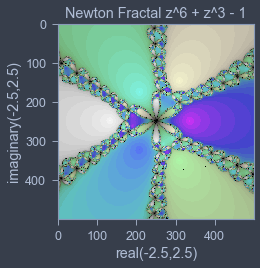

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


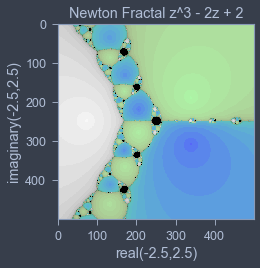

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


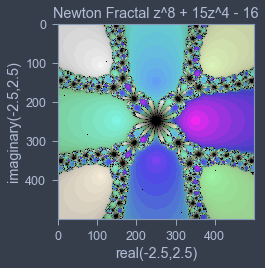

In [3]:
def f(x):
    return x ** 6 + x ** 3 - 1

def df(x):
    return 6 * x ** 5 + 3 * x ** 2


def f1(x):
    return x ** 3 - 2 * x + 2

def df1(x):
    return 3 * x ** 2 - 2


def f2(x):
    return x ** 8 + 15 * x ** 4 - 16

def df2(x):
    return 8 * x ** 7 + 60 * x ** 3

roots = np.roots([1, 0, 0, 1, 0, 0, -1])
roots1 = np.roots([1, 0, -2, 2])
roots2 = np.roots([1, 0, 0, 0, 15, 0, 0, 0, -16])

ds(f, df, roots, "z^6 + z^3 - 1", zoom = 1)
ds(f1, df1, roots1, "z^3 - 2z + 2", zoom = 1)
ds(f2, df2, roots2, "z^8 + 15z^4 - 16", zoom = 1)